### Importando librerias

In [4]:
import pandas as pd

# Select dataset - sentiment

In [2]:
df = pd.read_excel("../../Documents/data_manual_03062020_drive (1).xlsx",skiprows=1)

In [3]:
df.head(5)

,comment_id,marcas,message,SENTIMENT_SC,CATEGORY_SC,SENTIMENT_OR,CATEGORY_OR,Unnamed: 7,Unnamed: 8,DESC_1,DESC_2,DESC_3,DESC_4,DESC_5
0,2032715053449835_2034744706580203,Crediscotia,No llaman nada luego te dicen que tienes que e...,NEGATIVO,QUEJA,NEGATIVO,QUEJA,NaN,NaN,QUEJA/RECLAMO_PRODUCTO/EQUIPO/SERVICIO,CRITICA,NaN,NaN,NaN
1,10156367588876123_10156489257171123,Movistar,Yo tengo Movistar Total y hace más de un mes q...,NEGATIVO,QUEJA,NEGATIVO,QUEJA,NaN,NaN,QUEJA/RECLAMO_PRODUCTO/EQUIPO/SERVICIO,NaN,NaN,NaN,NaN
2,1249110398574541_1249184895233758,Movistar,Es la empresa de comunicación más mala en la ...,NEGATIVO,QUEJA,NEGATIVO,QUEJA,NaN,NaN,QUEJA/RECLAMO_PRODUCTO/EQUIPO/SERVICIO,CRITICA,NaN,NaN,NaN
3,729858610854512_147986526442557,Reposteras de Oro,Feliz día a mi mamita y a todas l@s reposter@s...,POSITIVO,REAC_POSI_CONT,POSITIVO,REAC_POSI_CONT,NaN,NaN,SALUDO,FELICITACION/AGRADECIMIENTO,NaN,NaN,NaN
4,2276380079083330_2276574055730599,Crediscotia,Erick Cg ala om,POSITIVO,REAC_POSI_CONT,POSITIVO,REAC_POSI_CONT,NaN,NaN,INFO_CONTACTO,NaN,NaN,NaN,NaN


In [4]:
df_fin = df[['message','SENTIMENT_SC','CATEGORY_SC']]
df_fin.columns = ['message','sentiment','category']

In [5]:
df_fin['category'].unique()

array(['QUEJA', 'REAC_POSI_CONT', 'SPAM_ELIMINADO', 'OTROS',
       'SOLI_COMP_INFO', 'REAC_NEGA_CONT', 'STICKER_ETIQUETA', 'HATER',
       nan], dtype=object)

In [6]:
df_fin.groupby(['sentiment','category']).size()

sentiment  category        
NEGATIVO   HATER                 40
           QUEJA                954
           REAC_NEGA_CONT      1323
           REAC_POSI_CONT         3
           SPAM_ELIMINADO         1
NEUTRO     OTROS                992
           REAC_NEGA_CONT         2
           REAC_POSI_CONT         3
           SOLI_COMP_INFO         1
           SPAM_ELIMINADO      1067
           STICKER_ETIQUETA     361
POSITIVO   OTROS                  5
           QUEJA                  1
           REAC_NEGA_CONT         3
           REAC_POSI_CONT       918
           SOLI_COMP_INFO      1466
           SPAM_ELIMINADO         1
           STICKER_ETIQUETA       1
dtype: int64

In [8]:

#df_fin.loc[((df_fin['sentiment']=='NEGATIVO') & (df_fin['category']=='REAC_NEGA_CONT')) | () | ()]

In [9]:
df_fin.loc[(df_fin['sentiment']=='NEUTRO') & (df_fin['category']=='SPAM_ELIMINADO')]

,message,sentiment,category
5,Ññbvññ,NEUTRO,SPAM_ELIMINADO
16,Rkdnfjjjhfg,NEUTRO,SPAM_ELIMINADO
22,Mm i Bb,NEUTRO,SPAM_ELIMINADO
31,Dei,NEUTRO,SPAM_ELIMINADO
64,Un nj,NEUTRO,SPAM_ELIMINADO
...,...,...,...
7119,Quieres pagar rápido y seguro? Yo te ayudo con...,NEUTRO,SPAM_ELIMINADO
7122,jki,NEUTRO,SPAM_ELIMINADO
7135,http://karolinaradio.com/estafa-movistar-solo-...,NEUTRO,SPAM_ELIMINADO
7145,Los interesados en solicitar instalación de in...,NEUTRO,SPAM_ELIMINADO


In [10]:
df_fin[(df_fin['sentiment']=='POSITIVO') & (df_fin['category']=='REAC_POSI_CONT')]

,message,sentiment,category
3,Feliz día a mi mamita y a todas l@s reposter@s...,POSITIVO,REAC_POSI_CONT
4,Erick Cg ala om,POSITIVO,REAC_POSI_CONT
9,SAN PABLO DEL PERÚ\nLA UNIVERSIDAD DEL ÉXITO.....,POSITIVO,REAC_POSI_CONT
10,Q linda mis sobrinos,POSITIVO,REAC_POSI_CONT
38,Evaluación imbox!!! tenemos la instalación en ...,POSITIVO,REAC_POSI_CONT
...,...,...,...
7156,Que sigaaaa,POSITIVO,REAC_POSI_CONT
7158,Las pantuflas de ley,POSITIVO,REAC_POSI_CONT
7161,Yehhh tengo mi insignia :3,POSITIVO,REAC_POSI_CONT
7162,Mayatortasydecoraciones,POSITIVO,REAC_POSI_CONT


In [11]:
df_u = df_fin.loc[(df_fin['sentiment']=='POSITIVO') & (df_fin['category']=='REAC_POSI_CONT') | (df_fin['sentiment']=='NEGATIVO') & (df_fin['category']=='REAC_NEGA_CONT') ]

In [12]:
df_u.groupby(['sentiment']).size()

sentiment
NEGATIVO    1323
POSITIVO     918
dtype: int64

In [13]:
df_u.groupby(['sentiment']).size().sum()

2241

In [14]:
df_u[~df_u['message'].duplicated()].shape

(2241, 3)

In [15]:
df_u[['message','sentiment']].to_csv('../../Documents/data_sentiment_pos_nega_25072020.csv',index=None)

In [61]:
df_sent = df_u.reset_index(drop=True).copy()

# Preprocesamiento - NLP

In [5]:
## with nlk

from nltk.corpus import stopwords

## with spacy
from spacy.lang.es import Spanish
from spacy.lang.es.stop_words import STOP_WORDS

In [63]:
len(stopwords.words('spanish'))

313

In [64]:
#'mas','si','mio','mia','mios','mias', estas
stopwords.words('spanish')
exclude_stopword = ['para',
'no',
'como',
'más',
'pero',
'sus',
'ya',
'o',
'este',
'sí',
'porque',
'muy',
'sin',
'tambien',
'todo',
'nos',
'ni',
'contra',
'tanto',
'nada',
'poco',
'fue',
'fui',
'fuiste',
'fuimos',
'fuisteis',
'sentida',
'sentido',
'tenia']


In [65]:
import spacy
print('spaCy Version: %s' % (spacy.__version__))


spaCy Version: 2.3.2


In [66]:
spacy_nlp = spacy.load('es_core_news_sm')


In [67]:
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:10])

Number of stop words: 551
First ten stop words: ['gran', 'haber', 'tenga', 'poner', 'conmigo', 'mediante', 'dijo', 'seis', 'ciertos', 'propias']


In [68]:
spacy_stopwords

{'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 

## Remove stopwords - nltk

In [69]:
#nlk_stopword
nltk_stopwords = stopwords.words('spanish')
print("Num. exclude stopwords: ",len(exclude_stopword))
print("Num. stopwords",len(nltk_stopwords))


Num. exclude stopwords:  30
Num. stopwords 313


In [70]:
len(set(nltk_stopwords)-set(exclude_stopword))

286

In [71]:
len(set(exclude_stopword))

30

In [72]:
len(set(stopwords.words('spanish')))

313

In [73]:
nltk_sw = [e for e in nltk_stopwords if (e not in exclude_stopword)]

In [79]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [93]:
def remove_stopword(message):
    tokens = nltk.tokenize.word_tokenize(message)
    tokens = [token for token in tokens if not token in nltk_sw]
    return tokens
'''
tokens = nltk.tokenize.word_tokenize(article)
tokens = [token for token in tokens if not token in nltk_stopwords]
print('Original Article: %s' % (article))
print()
print(tokens)
'''

"\ntokens = nltk.tokenize.word_tokenize(article)\ntokens = [token for token in tokens if not token in nltk_stopwords]\nprint('Original Article: %s' % (article))\nprint()\nprint(tokens)\n"

In [99]:
df_sent['count_without_stopword'] = df_sent['message'].apply(lambda x: len(remove_stopword(message=x)))

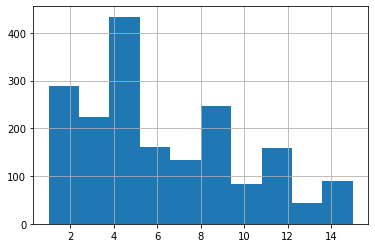

In [105]:
df_sent.loc[df_sent['count_without_stopword']<=15,'count_without_stopword'].hist()

In [110]:
snowball_stemmer = nltk.stem.SnowballStemmer('spanish')

In [3]:
snowball_stemmer.stem('informes')

NameError: name 'snowball_stemmer' is not defined

In [124]:
for token in tokens:
    stemmed_token = snowball_stemmer.stem(token)
    
    if token != stemmed_token:
        print('Original : %s, New: %s' % (token, stemmed_token))

Original : hola, New: hol
Original : quiero, New: quier
Original : asustarte, New: asustart
Original : pero, New: per
Original : enfermo, New: enferm
Original : poco, New: poc
Original : fiebre, New: fiebr
